In [1]:
import pandas as pd
import librosa 
import os
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

In [2]:
master_path = os.path.dirname(os.path.abspath(r'C:\Users\ROHAN SINGH\PROJECTS\MusicGenre'))

y, sr =  librosa.load(os.path.join(master_path , 'MusicGenre\genres\classical\classical.00009.wav') , res_type='kaiser_best')


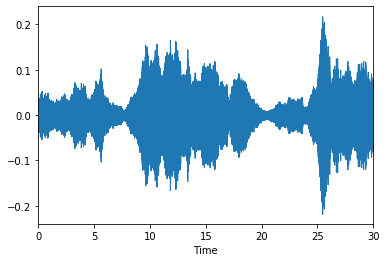

In [3]:
## Plotting  ##
import matplotlib.pyplot as plt
import librosa.display
plt.Figure(figsize=(10 , 5))
librosa.display.waveplot(y , sr , x_axis='time')
plt.show()


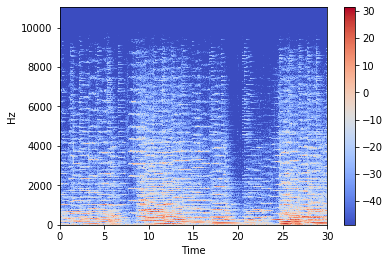

In [4]:
## Plotting.spectrogram ##
X = librosa.stft(y)
X = librosa.amplitude_to_db(abs(X))
plt.Figure(figsize=(20,10))
librosa.display.specshow(X , sr=sr , x_axis='time' , y_axis='linear')
plt.colorbar()
plt.show()


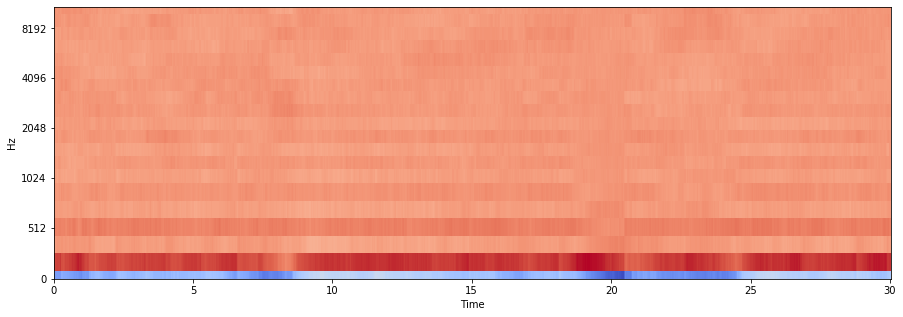

In [5]:
## Plotting.mfcc ##

import matplotlib.pyplot as plt
plt.figure(figsize = (15, 5))
librosa.display.specshow(librosa.feature.mfcc(y , sr=sr ,n_mfcc=20) , x_axis='time' , y_axis='mel' )
plt.show()

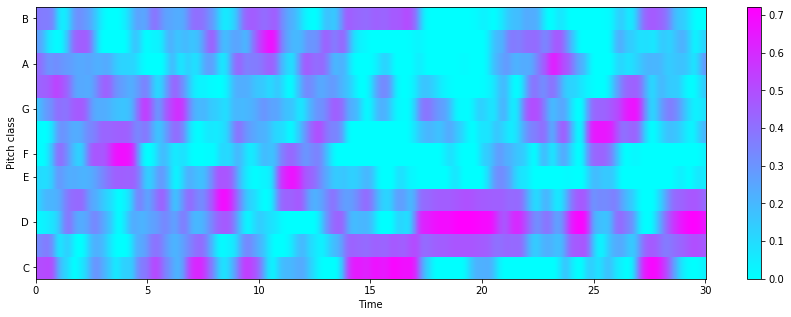

In [6]:
# plotting chromaVector
plt.figure(figsize = (15, 5))
librosa.display.specshow(librosa.feature.chroma_cens(y , sr=sr ) , x_axis='time' , y_axis='chroma' ,cmap = 'cool' )
plt.colorbar()
plt.show()

In [7]:
def feature_extraction(filename):
    max_pad_len = 1320
   
    try:
        sample , sr = librosa.load(filename , res_type='kaiser_fast')
        mfcc = librosa.feature.mfcc(y = sample , sr = sr , n_mfcc=70)
        pad_len = max_pad_len - mfcc.shape[1]
        mfs = np.pad(mfcc , pad_width=((0,0), (0,pad_len)) , mode = 'constant')
        chroma = librosa.feature.chroma_cens(y = sample , sr = sr)
        pad_len2 = max_pad_len - chroma.shape[1]
        chroma = np.pad(chroma , pad_width=((0,0) ,(0,pad_len2) ) , mode = 'constant')
    except Exception as e :
        print("The file could not be oopened as " , e)
        
        
    return mfs , chroma

In [8]:
## Extracting Features from disk
feature = []

for root , dirs , files in os.walk(r'C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres'):
       
    for file in files:
        if file.endswith('wav'):
            label = os.path.basename(root)
            path = root
            path_exten = os.path.join(path,file)
            print(path_exten)
            mfcc , chroma = feature_extraction(path_exten)
            
            feature.append([mfcc , chroma ,label])
            
            featuresdf = pd.DataFrame(feature , columns=['mfcc','chroma','class_label'])
            
print('Finished feature extraction from ', len(featuresdf), ' files')            
            
    

C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\blues\blues.00000.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\blues\blues.00001.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\blues\blues.00002.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\blues\blues.00003.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\blues\blues.00004.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\blues\blues.00005.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\blues\blues.00006.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\blues\blues.00007.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\blues\blues.00008.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\blues\blues.00009.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\blues\blues.00010.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\blues\blues.00011.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\blues\blues.00012.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\blues\blues.00013.wav
C:\Users\ROHAN SINGH

C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\classical\classical.00016.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\classical\classical.00017.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\classical\classical.00018.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\classical\classical.00019.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\classical\classical.00020.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\classical\classical.00021.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\classical\classical.00022.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\classical\classical.00023.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\classical\classical.00024.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\classical\classical.00025.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\classical\classical.00026.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\classical\classical.00027.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\classical\classi

C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\country\country.00023.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\country\country.00024.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\country\country.00025.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\country\country.00026.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\country\country.00027.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\country\country.00028.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\country\country.00029.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\country\country.00030.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\country\country.00031.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\country\country.00032.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\country\country.00033.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\country\country.00034.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\country\country.00035.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGen

C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\disco\disco.00036.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\disco\disco.00037.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\disco\disco.00038.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\disco\disco.00039.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\disco\disco.00040.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\disco\disco.00041.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\disco\disco.00042.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\disco\disco.00043.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\disco\disco.00044.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\disco\disco.00045.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\disco\disco.00046.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\disco\disco.00047.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\disco\disco.00048.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\disco\disco.00049.wav
C:\Users\ROHAN SINGH

C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\hiphop\hiphop.00052.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\hiphop\hiphop.00053.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\hiphop\hiphop.00054.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\hiphop\hiphop.00055.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\hiphop\hiphop.00056.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\hiphop\hiphop.00057.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\hiphop\hiphop.00058.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\hiphop\hiphop.00059.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\hiphop\hiphop.00060.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\hiphop\hiphop.00061.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\hiphop\hiphop.00062.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\hiphop\hiphop.00063.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\hiphop\hiphop.00064.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\hiphop\hiphop.00

C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\jazz\jazz.00070.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\jazz\jazz.00071.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\jazz\jazz.00072.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\jazz\jazz.00073.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\jazz\jazz.00074.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\jazz\jazz.00075.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\jazz\jazz.00076.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\jazz\jazz.00077.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\jazz\jazz.00078.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\jazz\jazz.00079.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\jazz\jazz.00080.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\jazz\jazz.00081.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\jazz\jazz.00082.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\jazz\jazz.00083.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\

C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\metal\metal.00088.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\metal\metal.00089.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\metal\metal.00090.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\metal\metal.00091.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\metal\metal.00092.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\metal\metal.00093.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\metal\metal.00094.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\metal\metal.00095.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\metal\metal.00096.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\metal\metal.00097.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\metal\metal.00098.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\metal\metal.00099.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\pop\pop.00000.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\pop\pop.00001.wav
C:\Users\ROHAN SINGH\PROJECT

C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\reggae\reggae.00011.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\reggae\reggae.00012.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\reggae\reggae.00013.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\reggae\reggae.00014.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\reggae\reggae.00015.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\reggae\reggae.00016.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\reggae\reggae.00017.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\reggae\reggae.00018.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\reggae\reggae.00019.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\reggae\reggae.00020.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\reggae\reggae.00021.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\reggae\reggae.00022.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\reggae\reggae.00023.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\reggae\reggae.00

C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\rock\rock.00027.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\rock\rock.00028.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\rock\rock.00029.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\rock\rock.00030.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\rock\rock.00031.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\rock\rock.00032.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\rock\rock.00033.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\rock\rock.00034.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\rock\rock.00035.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\rock\rock.00036.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\rock\rock.00037.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\rock\rock.00038.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\rock\rock.00039.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\rock\rock.00040.wav
C:\Users\ROHAN SINGH\PROJECTS\MusicGenre\genres\

In [10]:
X_mfcc = np.asarray(featuresdf.mfcc.tolist())
Y = np.asarray(featuresdf.class_label.tolist())
X_chroma = np.asarray(featuresdf.chroma.tolist())

In [11]:
X_mfcc = np.expand_dims(X_mfcc , axis =-1)

X_chroma = np.expand_dims(X_chroma , axis = -1)
print(X_chroma.shape , X_mfcc.shape)

(1000, 12, 1320, 1) (1000, 70, 1320, 1)


In [12]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
# Convert features and corresponding classification labels into numpy arrays


# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(Y)) 

# split the dataset 
from sklearn.model_selection import train_test_split 

x_train_mfcc, x_test_mfcc, x_train_chroma, x_test_chroma,y_train,y_test = train_test_split(X_mfcc,X_chroma,yy, test_size=0.3, random_state = 42 , shuffle = True)

Using TensorFlow backend.


In [13]:
print(y_test.shape)

(300, 10)


In [14]:

from keras.layers import Dense , Dropout , Conv2D , BatchNormalization , Activation , Flatten , MaxPool2D, GlobalAveragePooling2D , AveragePooling2D, LeakyReLU , MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 
from keras.layers import Input , concatenate
from keras.models import Model

In [15]:
def Model_archi():
    inputA = Input(shape=(70,1320,1))
    inputB = Input(shape = (12,1320,1))
    
    x = Conv2D(filters=16, kernel_size=2, activation='relu')(inputA)
    x = MaxPooling2D(pool_size=2)(x)
    
    x = Conv2D(filters=32, kernel_size=2)(x)
    x = LeakyReLU(0.8)(x)
    x = MaxPooling2D(pool_size=2)(x)
    
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(filters=64, kernel_size=2)(x)
    x = LeakyReLU(0.8)(x)
    x = MaxPooling2D(pool_size=2)(x)
    
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(filters=128, kernel_size=2)(x)
    x = LeakyReLU(0.8)(x)
    x = MaxPooling2D(pool_size=2)(x)
    
    x = GlobalAveragePooling2D()(x)
    x = Model(inputs=inputA, outputs=x)
    
    y = Conv2D(filters=16, kernel_size=2, activation='relu')(inputB)
    y = MaxPooling2D(pool_size=2)(y)
    
    y = Conv2D(filters=64, kernel_size=2)(y)
    y = LeakyReLU(0.8)(y)
    y = MaxPooling2D(pool_size=2)(y)
    
    y = BatchNormalization(momentum=0.8)(y)
    y = Conv2D(filters=128, kernel_size=2)(y)
    y = LeakyReLU(0.8)(y)
    #y = MaxPooling2D(pool_size=2)(y)
    
   # x = BatchNormalization(momentum=0.8)(x)
   # x = Conv2D(filters=128, kernel_size=2))(x)
   # x = LeakyReLU(0.8)(x)
   # x = MaxPooling2D(pool_size=2)(x)
    
    y = GlobalAveragePooling2D()(y)
    y = Model(inputs=inputB, outputs=y)
    
    combined = concatenate([x.output, y.output])
    z = Dense(10, activation="softmax")(combined)
    
    model = Model(inputs=[x.input, y.input], outputs=z)
    
    return model

In [16]:
model = Model_archi()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate([x_test_mfcc , x_test_chroma], y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 70, 1320, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 69, 1319, 16) 80          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 34, 659, 16)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 33, 658, 32)  2080        max_pooling2d_1[0][0]            
____________________________________________________________________________________________

In [17]:
## Training
from datetime import datetime
start = datetime.now()

history=model.fit([x_train_mfcc,x_train_chroma],y_train , batch_size= 64 , epochs=100 ,verbose=1 , validation_data=([x_test_mfcc,x_test_chroma] , y_test) , shuffle=True)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 38s 55ms/step - loss: 2.0539 - accuracy: 0.3014 - val_loss: 1.8309 - val_accuracy: 0.3533
Epoch 2/100
700/700 [==============================] - 36s 52ms/step - loss: 1.4960 - accuracy: 0.4614 - val_loss: 1.4569 - val_accuracy: 0.4900
Epoch 3/100
700/700 [==============================] - 36s 52ms/step - loss: 1.2328 - accuracy: 0.6000 - val_loss: 1.2955 - val_accuracy: 0.5267
Epoch 4/100
700/700 [==============================] - 38s 54ms/step - loss: 1.0721 - accuracy: 0.6629 - val_loss: 1.2265 - val_accuracy: 0.5400
Epoch 5/100
700/700 [==============================] - 37s 53ms/step - loss: 0.9575 - accuracy: 0.7057 - val_loss: 1.1023 - val_accuracy: 0.5900
Epoch 6/100
700/700 [==============================] - 37s 53ms/step - loss: 0.8880 - accuracy: 0.7186 - val_loss: 1.1023 - val_accuracy: 0.5633
Epoch 7/100
700/700 [==============================] - 37s 52ms/step - loss: 0.8214 

Epoch 57/100
700/700 [==============================] - 36s 52ms/step - loss: 0.1088 - accuracy: 0.9829 - val_loss: 0.9334 - val_accuracy: 0.7167
Epoch 58/100
700/700 [==============================] - 36s 52ms/step - loss: 0.0875 - accuracy: 0.9886 - val_loss: 0.8302 - val_accuracy: 0.7200
Epoch 59/100
700/700 [==============================] - 36s 52ms/step - loss: 0.0935 - accuracy: 0.9829 - val_loss: 1.3852 - val_accuracy: 0.6100
Epoch 60/100
700/700 [==============================] - 36s 52ms/step - loss: 0.1048 - accuracy: 0.9800 - val_loss: 0.9891 - val_accuracy: 0.7400
Epoch 61/100
700/700 [==============================] - 36s 52ms/step - loss: 0.0804 - accuracy: 0.9900 - val_loss: 0.8564 - val_accuracy: 0.7433
Epoch 62/100
700/700 [==============================] - 37s 52ms/step - loss: 0.0826 - accuracy: 0.9929 - val_loss: 0.9343 - val_accuracy: 0.7067
Epoch 63/100
700/700 [==============================] - 36s 52ms/step - loss: 0.0785 - accuracy: 0.9886 - val_loss: 1.1561 -

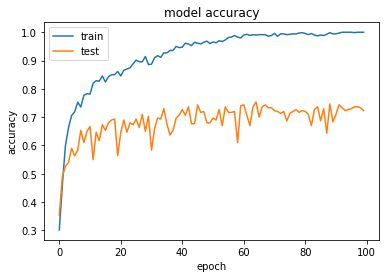

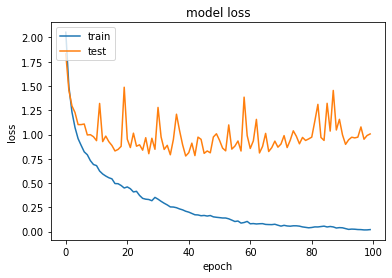

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()